In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
import glob
import math

In [2]:
import os
import time
import unicodedata
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
from pylab import rcParams
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from datetime import date
from matplotlib import pyplot as plt

In [3]:
path = '/Users/kate/CSCE633/google'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

google = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
# google = pd.DataFrame(google.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
google[['DATE','TIME']] = google.DATETIME.str.split(expand=True)
google[["YEAR", "MONTH", "DAY"]] = google.DATE.str.split(".", expand=True)
google[["HOUR", "MINUTES", "SECONDS"]] = google.TIME.str.split(":", expand=True)

In [5]:
google.loc[:, 'DATE'] = pd.to_datetime(google['DATE'],format='%Y.%m.%d')
google = google.sort_values(['DATETIME'])

In [6]:
new_google = google
google.head()


,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
0,2014.03.27 09:30:00,566.47,566.47,558.34,551.51,8,8,560.765932,2014-03-27,09:30:00,2014,03,27,09,30,00
1,2014.03.27 10:00:00,560.01,561.85,559.79,559.79,12,12,560.583425,2014-03-27,10:00:00,2014,03,27,10,00,00
2,2014.03.27 11:00:00,560.33,560.33,551.43,551.43,18,17,554.755161,2014-03-27,11:00:00,2014,03,27,11,00,00
3,2014.03.27 12:00:00,551.70,556.64,555.60,551.70,9,9,554.783086,2014-03-27,12:00:00,2014,03,27,12,00,00
4,2014.03.27 13:00:00,557.08,560.33,557.49,557.08,13,13,558.598783,2014-03-27,13:00:00,2014,03,27,13,00,00


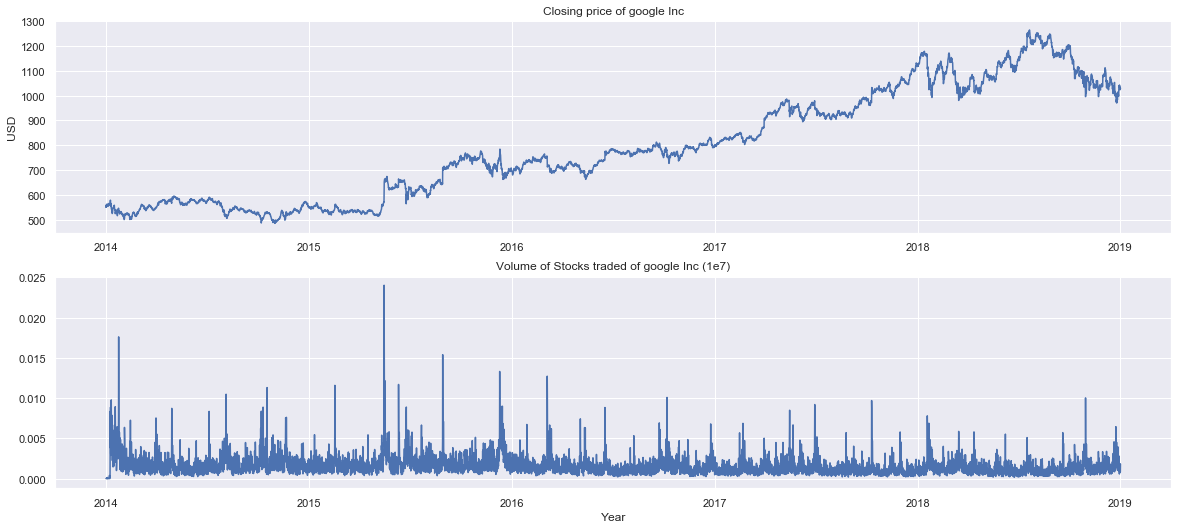

In [8]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2014, 2019, num = 8367)
ax[0].plot(date, google['CLOSE'])
ax[0].set_title('Closing price of google Inc')
ax[0].set_ylabel("USD")

ax[1].plot(date, google['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of google Inc (1e7)')
ax[1].set_xlabel("Year")

plt.show()

Text(0, 0.5, 'USD')

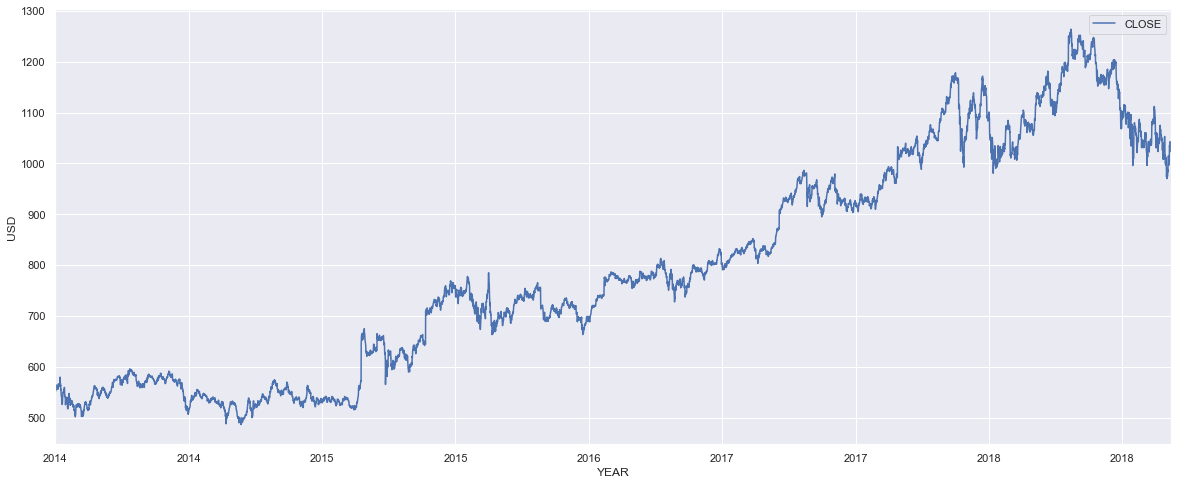

In [9]:
rcParams['figure.figsize'] = 20, 8 # width 10, height 8

ax = google.plot(x='YEAR', y='CLOSE', style='b-', grid=True)
ax.set_xlabel("YEAR")
ax.set_ylabel("USD")

In [10]:
google.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
0,2014.03.27 09:30:00,566.47,566.47,558.34,551.51,8,8,560.765932,2014-03-27,09:30:00,2014,03,27,09,30,00
1,2014.03.27 10:00:00,560.01,561.85,559.79,559.79,12,12,560.583425,2014-03-27,10:00:00,2014,03,27,10,00,00
2,2014.03.27 11:00:00,560.33,560.33,551.43,551.43,18,17,554.755161,2014-03-27,11:00:00,2014,03,27,11,00,00
3,2014.03.27 12:00:00,551.70,556.64,555.60,551.70,9,9,554.783086,2014-03-27,12:00:00,2014,03,27,12,00,00
4,2014.03.27 13:00:00,557.08,560.33,557.49,557.08,13,13,558.598783,2014-03-27,13:00:00,2014,03,27,13,00,00


Text(0, 0.5, 'USD')

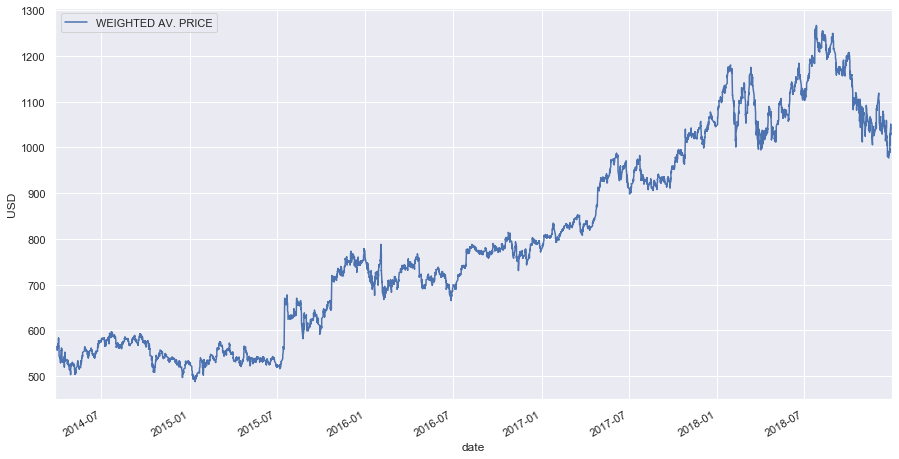

In [11]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = google.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [12]:
# Get difference between high and low of each hour
google['RANGE_HL'] = google['HIGH'] - google['LOW']
#df.drop(['high', 'low'], axis=1, inplace=True)

# Get difference between open and close of each hour
google['RANGE_OC'] = google['OPEN'] - google['CLOSE']
#df.drop(['open', 'close'], axis=1, inplace=True)

google.head(10)

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,RANGE_HL,RANGE_OC
0,2014.03.27 09:30:00,566.47,566.47,558.34,551.51,8,8,560.765932,2014-03-27,09:30:00,2014,03,27,09,30,00,8.13,14.96
1,2014.03.27 10:00:00,560.01,561.85,559.79,559.79,12,12,560.583425,2014-03-27,10:00:00,2014,03,27,10,00,00,2.06,0.22
2,2014.03.27 11:00:00,560.33,560.33,551.43,551.43,18,17,554.755161,2014-03-27,11:00:00,2014,03,27,11,00,00,8.90,8.90
3,2014.03.27 12:00:00,551.70,556.64,555.60,551.70,9,9,554.783086,2014-03-27,12:00:00,2014,03,27,12,00,00,1.04,0.00
4,2014.03.27 13:00:00,557.08,560.33,557.49,557.08,13,13,558.598783,2014-03-27,13:00:00,2014,03,27,13,00,00,2.84,0.00
5,2014.03.27 14:00:00,557.49,560.40,557.23,557.23,6,6,558.561883,2014-03-27,14:00:00,2014,03,27,14,00,00,3.17,0.26
6,2014.03.27 15:00:00,557.59,557.59,556.96,555.85,7,7,556.856487,2014-03-27,15:00:00,2014,03,27,15,00,00,0.63,1.74
7,2014.03.28 09:30:00,559.69,564.00,562.13,559.69,31,31,562.123267,2014-03-28,09:30:00,2014,03,28,09,30,00,1.87,0.00
8,2014.03.28 10:00:00,562.63,564.42,564.42,562.43,74,63,563.055749,2014-03-28,10:00:00,2014,03,28,10,00,00,0.00,0.20
9,2014.03.28 11:00:00,564.58,564.90,564.16,563.89,25,25,564.414082,2014-03-28,11:00:00,2014,03,28,11,00,00,0.74,0.69


In [13]:
 google.drop(['HIGH', 'LOW', 'OPEN', 'CLOSE', 'DATETIME', 'MONTH', 'DAY', 'MINUTES', 'SECONDS'], axis=1, inplace=True)

In [14]:
google.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC
0,8,8,560.765932,2014-03-27,09:30:00,2014,09,8.13,14.96
1,12,12,560.583425,2014-03-27,10:00:00,2014,10,2.06,0.22
2,18,17,554.755161,2014-03-27,11:00:00,2014,11,8.90,8.90
3,9,9,554.783086,2014-03-27,12:00:00,2014,12,1.04,0.00
4,13,13,558.598783,2014-03-27,13:00:00,2014,13,2.84,0.00
5,6,6,558.561883,2014-03-27,14:00:00,2014,14,3.17,0.26
6,7,7,556.856487,2014-03-27,15:00:00,2014,15,0.63,1.74
7,31,31,562.123267,2014-03-28,09:30:00,2014,09,1.87,0.00
8,74,63,563.055749,2014-03-28,10:00:00,2014,10,0.00,0.20
9,25,25,564.414082,2014-03-28,11:00:00,2014,11,0.74,0.69


In [15]:
google['ORDER_HOURS'] = [x for x in list(range(len(google)))]

# merging_keys
merging_keys = ['ORDER_HOURS']

# List of columns that we will use to create lags
lag_cols = ['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']
lag_cols

['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']

In [16]:
google.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS
0,8,8,560.765932,2014-03-27,09:30:00,2014,09,8.13,14.96,0
1,12,12,560.583425,2014-03-27,10:00:00,2014,10,2.06,0.22,1
2,18,17,554.755161,2014-03-27,11:00:00,2014,11,8.90,8.90,2
3,9,9,554.783086,2014-03-27,12:00:00,2014,12,1.04,0.00,3
4,13,13,558.598783,2014-03-27,13:00:00,2014,13,2.84,0.00,4
5,6,6,558.561883,2014-03-27,14:00:00,2014,14,3.17,0.26,5
6,7,7,556.856487,2014-03-27,15:00:00,2014,15,0.63,1.74,6
7,31,31,562.123267,2014-03-28,09:30:00,2014,09,1.87,0.00,7
8,74,63,563.055749,2014-03-28,10:00:00,2014,10,0.00,0.20,8
9,25,25,564.414082,2014-03-28,11:00:00,2014,11,0.74,0.69,9


In [17]:
N = 7
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = google[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['ORDER_HOURS'] = train_shift['ORDER_HOURS'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    google = pd.merge(google, train_shift, on=merging_keys, how='left') #.fillna(0)
    
    del train_shift

# Remove the first N rows which contain NaNs
google = google[N:]
    
google.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_5,VOLUME_lag_5,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7
7,31,31,562.123267,2014-03-28,09:30:00,2014,09,1.87,0.00,7,...,8.90,18.0,560.583425,2.06,0.22,12.0,560.765932,8.13,14.96,8.0
8,74,63,563.055749,2014-03-28,10:00:00,2014,10,0.00,0.20,8,...,0.00,9.0,554.755161,8.90,8.90,18.0,560.583425,2.06,0.22,12.0
9,25,25,564.414082,2014-03-28,11:00:00,2014,11,0.74,0.69,9,...,0.00,13.0,554.783086,1.04,0.00,9.0,554.755161,8.90,8.90,18.0
10,9,9,562.847312,2014-03-28,12:00:00,2014,12,0.78,1.07,10,...,0.26,6.0,558.598783,2.84,0.00,13.0,554.783086,1.04,0.00,9.0
11,6,6,562.662810,2014-03-28,13:00:00,2014,13,1.71,0.23,11,...,1.74,7.0,558.561883,3.17,0.26,6.0,558.598783,2.84,0.00,13.0
12,142,135,558.834148,2014-03-28,14:00:00,2014,14,1.99,4.81,12,...,0.00,31.0,556.856487,0.63,1.74,7.0,558.561883,3.17,0.26,6.0
13,12,12,558.314551,2014-03-28,15:00:00,2014,15,0.33,0.19,13,...,0.20,74.0,562.123267,1.87,0.00,31.0,556.856487,0.63,1.74,7.0
14,5,5,563.297098,2014-03-31,09:30:00,2014,09,0.95,3.88,14,...,0.69,25.0,563.055749,0.00,0.20,74.0,562.123267,1.87,0.00,31.0
15,4,4,563.902463,2014-03-31,10:00:00,2014,10,2.99,2.99,15,...,1.07,9.0,564.414082,0.74,0.69,25.0,563.055749,0.00,0.20,74.0
16,8,6,560.766929,2014-03-31,11:00:00,2014,11,1.44,0.89,16,...,0.23,6.0,562.847312,0.78,1.07,9.0,564.414082,0.74,0.69,25.0


In [18]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 7 to 8366
Data columns (total 38 columns):
VOLUME                      8360 non-null int64
NUMBER OF TRADES            8360 non-null int64
WEIGHTED AV. PRICE          8360 non-null float64
DATE                        8360 non-null datetime64[ns]
TIME                        8360 non-null object
YEAR                        8360 non-null object
HOUR                        8360 non-null object
RANGE_HL                    8360 non-null float64
RANGE_OC                    8360 non-null float64
ORDER_HOURS                 8360 non-null int64
WEIGHTED AV. PRICE_lag_1    8360 non-null float64
RANGE_HL_lag_1              8360 non-null float64
RANGE_OC_lag_1              8360 non-null float64
VOLUME_lag_1                8360 non-null float64
WEIGHTED AV. PRICE_lag_2    8360 non-null float64
RANGE_HL_lag_2              8360 non-null float64
RANGE_OC_lag_2              8360 non-null float64
VOLUME_lag_2                8360 non-null flo

In [19]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [20]:
cols_list = [
"WEIGHTED AV. PRICE",
"RANGE_HL",
"RANGE_OC",
"VOLUME"
]


for col in cols_list:
    google = get_mov_avg_std(google, col, N)
google.head()

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std
7,31,31,562.123267,2014-03-28,09:30:00,2014,09,1.87,0.00,7,...,14.96,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,74,63,563.055749,2014-03-28,10:00:00,2014,10,0.00,0.20,8,...,0.22,12.0,562.123267,NaN,1.8700,NaN,0.000000,NaN,31.000000,NaN
9,25,25,564.414082,2014-03-28,11:00:00,2014,11,0.74,0.69,9,...,8.90,18.0,562.589508,0.659365,0.9350,1.322290,0.100000,0.141421,52.500000,30.405592
10,9,9,562.847312,2014-03-28,12:00:00,2014,12,0.78,1.07,10,...,0.00,9.0,563.197700,1.151985,0.8700,0.941754,0.296667,0.355012,43.333333,26.727015
11,6,6,562.662810,2014-03-28,13:00:00,2014,13,1.71,0.23,11,...,0.00,13.0,563.110103,0.956769,0.8475,0.770254,0.490000,0.483253,34.750000,27.765386


In [21]:
cv_size = 0.0
test_size = 0.2
# Get sizes of each of the datasets
num_cv = int(cv_size*len(google))
num_test = int(test_size*len(google))
num_train = len(google) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = google[:num_train]
cv = google[num_train:num_train+num_cv]
train_cv = google[:num_train+num_cv]
test = google[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 6688
num_cv = 0
num_test = 1672
train.shape = (6688, 46)
cv.shape = (0, 46)
train_cv.shape = (6688, 46)
test.shape = (1672, 46)


In [22]:
cols_to_scale = [
"WEIGHTED AV. PRICE"
]
N = 7
for i in range(1,N+1):
    cols_to_scale.append("WEIGHTED AV. PRICE_lag_"+str(i))
    cols_to_scale.append("RANGE_HL_lag_"+str(i))
    cols_to_scale.append("RANGE_OC_lag_"+str(i))
    cols_to_scale.append("VOLUME_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['DATE', 'HOUR']] = train.reset_index()[['DATE', 'HOUR']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [ 718.49567655  718.41001977    1.97736693    2.04130084 1606.8513756
  718.32468542    1.97744767    2.04122159 1606.74327153  718.24016849
    1.97783941    2.04122159 1606.64294258  718.15556354    1.97773026
    2.04116627 1606.5527811   718.07119245    1.97855114    2.0420619
 1606.42419258  717.98714542    1.97794707    2.04085825 1606.27796053
  717.90326682    1.97877392    2.04305323 1606.09464713]
scaler.var_ = [2.54599740e+04 2.54385873e+04 4.50891829e+00 4.94322199e+00
 1.59252139e+06 2.54171594e+04 4.50906727e+00 4.94346231e+00
 1.59278934e+06 2.53963782e+04 4.50871655e+00 4.94346231e+00
 1.59304181e+06 2.53761569e+04 4.50884159e+00 4.94366769e+00
 1.59327552e+06 2.53561139e+04 4.51569893e+00 4.95058805e+00
 1.59357346e+06 2.53353362e+04 4.51315974e+00 4.94528347e+00
 1.59389673e+06 2.53146500e+04 4.51876025e+00 4.96977082e+00
 1.59425793e+06]
train_scaled.shape = (6688, 29)
train_scaled.shape = (6688, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.980011,-1.012908,-0.634526,-0.135517,-1.267760,-1.002103,0.561609,-0.801129,-1.268360,-1.001751,...,-0.988898,0.038624,-0.818805,-1.262798,-0.987628,2.893690,5.794176,-1.265678,2014-03-28,09
1,-0.974167,-0.979886,-0.050563,-0.918125,-1.248742,-1.012800,-0.634554,-0.135479,-1.267568,-1.001982,...,-1.025515,3.258326,3.084425,-1.258046,-0.988775,0.038211,-0.817770,-1.262510,2014-03-28,10
2,-0.965655,-0.974040,-0.931217,-0.828170,-1.214667,-0.979764,-0.050600,-0.918067,-1.248551,-1.012683,...,-1.025339,-0.441507,-0.917735,-1.265174,-1.025407,3.255917,3.075832,-1.257758,2014-03-28,11
3,-0.975474,-0.965523,-0.582723,-0.607781,-1.253496,-0.973915,-0.931240,-0.828115,-1.214480,-0.979634,...,-1.001367,0.405783,-0.917735,-1.262006,-1.025231,-0.441623,-0.916456,-1.264886,2014-03-28,12
4,-0.976630,-0.975347,-0.563886,-0.436866,-1.266175,-0.965395,-0.582752,-0.607730,-1.253305,-0.973783,...,-1.001599,0.561119,-0.800818,-1.267551,-1.001249,0.405142,-0.916456,-1.261718,2014-03-28,13


In [23]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['DATE', 'HOUR']] = train_cv.reset_index()[['DATE', 'HOUR']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [ 718.49567655  718.41001977    1.97736693    2.04130084 1606.8513756
  718.32468542    1.97744767    2.04122159 1606.74327153  718.24016849
    1.97783941    2.04122159 1606.64294258  718.15556354    1.97773026
    2.04116627 1606.5527811   718.07119245    1.97855114    2.0420619
 1606.42419258  717.98714542    1.97794707    2.04085825 1606.27796053
  717.90326682    1.97877392    2.04305323 1606.09464713]
scaler_train_cv.var_ = [2.54599740e+04 2.54385873e+04 4.50891829e+00 4.94322199e+00
 1.59252139e+06 2.54171594e+04 4.50906727e+00 4.94346231e+00
 1.59278934e+06 2.53963782e+04 4.50871655e+00 4.94346231e+00
 1.59304181e+06 2.53761569e+04 4.50884159e+00 4.94366769e+00
 1.59327552e+06 2.53561139e+04 4.51569893e+00 4.95058805e+00
 1.59357346e+06 2.53353362e+04 4.51315974e+00 4.94528347e+00
 1.59389673e+06 2.53146500e+04 4.51876025e+00 4.96977082e+00
 1.59425793e+06]
train_cv_scaled.shape = (6688, 29)
train_cv_scaled.shape = (6688, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.980011,-1.012908,-0.634526,-0.135517,-1.267760,-1.002103,0.561609,-0.801129,-1.268360,-1.001751,...,-0.988898,0.038624,-0.818805,-1.262798,-0.987628,2.893690,5.794176,-1.265678,2014-03-28,09
1,-0.974167,-0.979886,-0.050563,-0.918125,-1.248742,-1.012800,-0.634554,-0.135479,-1.267568,-1.001982,...,-1.025515,3.258326,3.084425,-1.258046,-0.988775,0.038211,-0.817770,-1.262510,2014-03-28,10
2,-0.965655,-0.974040,-0.931217,-0.828170,-1.214667,-0.979764,-0.050600,-0.918067,-1.248551,-1.012683,...,-1.025339,-0.441507,-0.917735,-1.265174,-1.025407,3.255917,3.075832,-1.257758,2014-03-28,11
3,-0.975474,-0.965523,-0.582723,-0.607781,-1.253496,-0.973915,-0.931240,-0.828115,-1.214480,-0.979634,...,-1.001367,0.405783,-0.917735,-1.262006,-1.025231,-0.441623,-0.916456,-1.264886,2014-03-28,12
4,-0.976630,-0.975347,-0.563886,-0.436866,-1.266175,-0.965395,-0.582752,-0.607730,-1.253305,-0.973783,...,-1.001599,0.561119,-0.800818,-1.267551,-1.001249,0.405142,-0.916456,-1.261718,2014-03-28,13


In [24]:
def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

In [25]:
# Do scaling for dev set
cv_scaled = cv[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)
    
# Now the entire dev set is scaled
cv_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [26]:
cv_scaled.tail()

,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [27]:
# Do scaling for test set
test_scaled = test[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)
    
# Now the entire test set is scaled
test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
6695,2018-01-17,1.416034,1.307429,-0.000172,-0.777267,-1.160637,-0.279030,-0.506356,-0.438179,-0.014160,...,0.334052,2.145267,-0.554661,-1.105912,-0.335501,-0.521891,-0.820114,0.281655,0.745558,1.756204
6696,2018-01-18,1.240607,0.936815,0.843547,-0.279390,-0.946741,-1.275970,-0.518867,-1.084198,-0.208686,...,-0.524895,0.333673,2.145453,1.989493,-0.948511,-0.364052,-0.505453,-0.731695,0.104143,0.456075
6697,2018-01-18,0.675455,1.019193,0.721286,0.629826,-0.471355,-1.125777,-1.448628,1.947215,-1.007620,...,-0.708911,-0.553705,0.511758,0.033907,2.102700,-0.896248,-0.299666,-0.444000,-0.674935,0.178242
6698,2018-01-18,-1.104399,0.676762,1.066973,0.728790,0.624964,-0.625095,-1.367994,-0.186651,2.077180,...,-0.480227,-0.716705,-0.605950,1.486607,-0.199579,1.367553,-0.904182,-0.452264,-0.561599,-0.736535
6699,2018-01-18,-0.302975,-1.605104,0.608115,1.092981,0.672764,0.543752,-1.009534,0.077195,-0.229731,...,-0.474501,-0.486514,-0.723764,-0.491540,1.489667,-0.250786,1.366782,-0.978064,-0.511603,-0.624456


In [28]:
test_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
8362,2018-12-31,-1.702016,0.668961,-0.277302,1.529925,-0.125148,0.282901,-0.377319,0.716846,1.009739,...,-0.105078,-0.805221,-0.834066,0.661542,-0.022989,1.903306,-0.491353,-1.127847,-0.469736,-0.452923
8363,2018-12-31,-1.607793,-0.994307,0.701434,0.024660,1.317203,0.133481,0.425321,-1.097960,0.717661,...,-1.219081,-0.138917,-0.858129,0.037814,0.591720,-0.106790,1.858840,-0.584717,-1.234208,-0.562659
8364,2018-12-31,-0.784138,-1.337469,-0.751425,0.868465,0.221962,1.456689,0.325917,-0.736455,-1.045435,...,1.529448,-1.241984,-0.150826,-0.649947,0.052979,0.600777,-0.090030,1.853926,-0.562688,-1.205017
8365,2018-12-31,-0.300770,-0.680831,-1.235027,-0.648067,0.974355,0.326842,1.563499,-0.526986,-0.755368,...,0.905745,1.525810,-0.990267,-0.800782,-0.806136,-0.029829,0.575156,-0.187767,1.959125,-0.709767
8366,2018-12-31,-0.104307,-0.038036,-0.562179,-1.326469,-0.516994,1.720484,0.827501,-0.608611,-0.566859,...,0.564560,0.893335,1.558838,-0.691060,-0.806492,-0.811861,-0.033364,0.573327,-0.191748,1.961199


In [29]:
features = []
for i in range(1,N+1):
    features.append("WEIGHTED AV. PRICE_lag_"+str(i))
    features.append("RANGE_HL_lag_"+str(i))
    features.append("RANGE_OC_lag_"+str(i))
    features.append("VOLUME_lag_"+str(i))
    

    

target = "WEIGHTED AV. PRICE"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (6688, 28)
y_train.shape = (6688,)
X_cv.shape = (0, 28)
y_cv.shape = (0,)
X_train_cv.shape = (6688, 28)
y_train_cv.shape = (6688,)
X_sample.shape = (1672, 28)
y_sample.shape = (1672,)


In [30]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (6688, 28)
y_train_scaled.shape = (6688,)
X_cv_scaled.shape = (0, 112)
X_train_cv_scaled.shape = (6688, 28)
y_train_cv_scaled.shape = (6688,)
X_sample_scaled.shape = (1672, 28)


Text(0.5, 1.0, 'Without scaling')

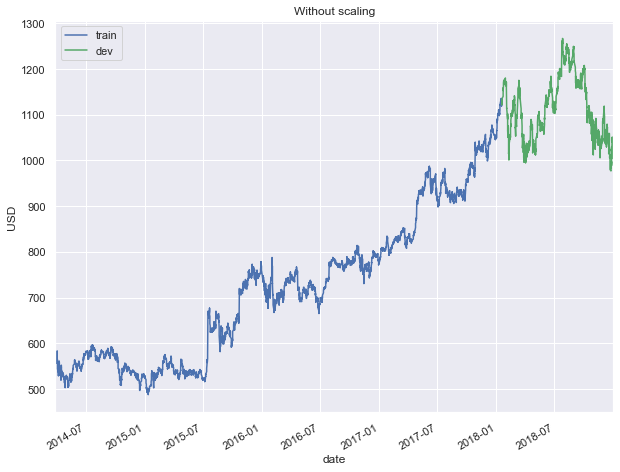

In [31]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

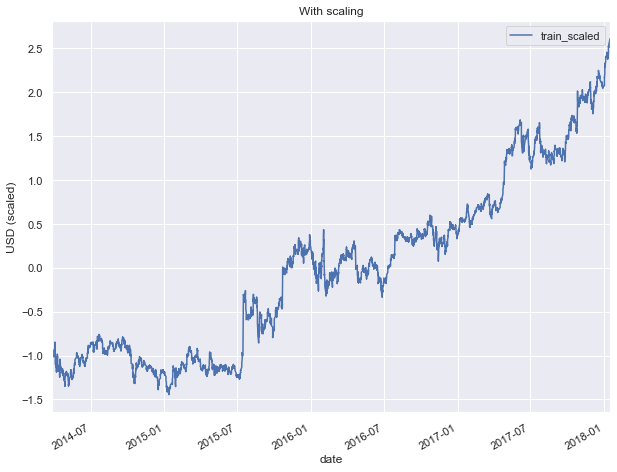

In [32]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

REGRESSION

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
polynomial_features = PolynomialFeatures(degree=2,
                                                 include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
model = pipeline.fit(X_train_scaled, y_train_scaled)


In [34]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#results = []
rmse1 = []
mape1 = []


First we are going to see if a polynomial model will model the data well enough. We will train using degrees 1 to 4 and look at teh loss functions.

***SVR***
<br>
We are going to run the same model paramters we identified for the Apple stock C=1/8 and gamma = 1/2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 2.24 s, sys: 83.5 ms, total: 2.33 s
Wall time: 2.38 s


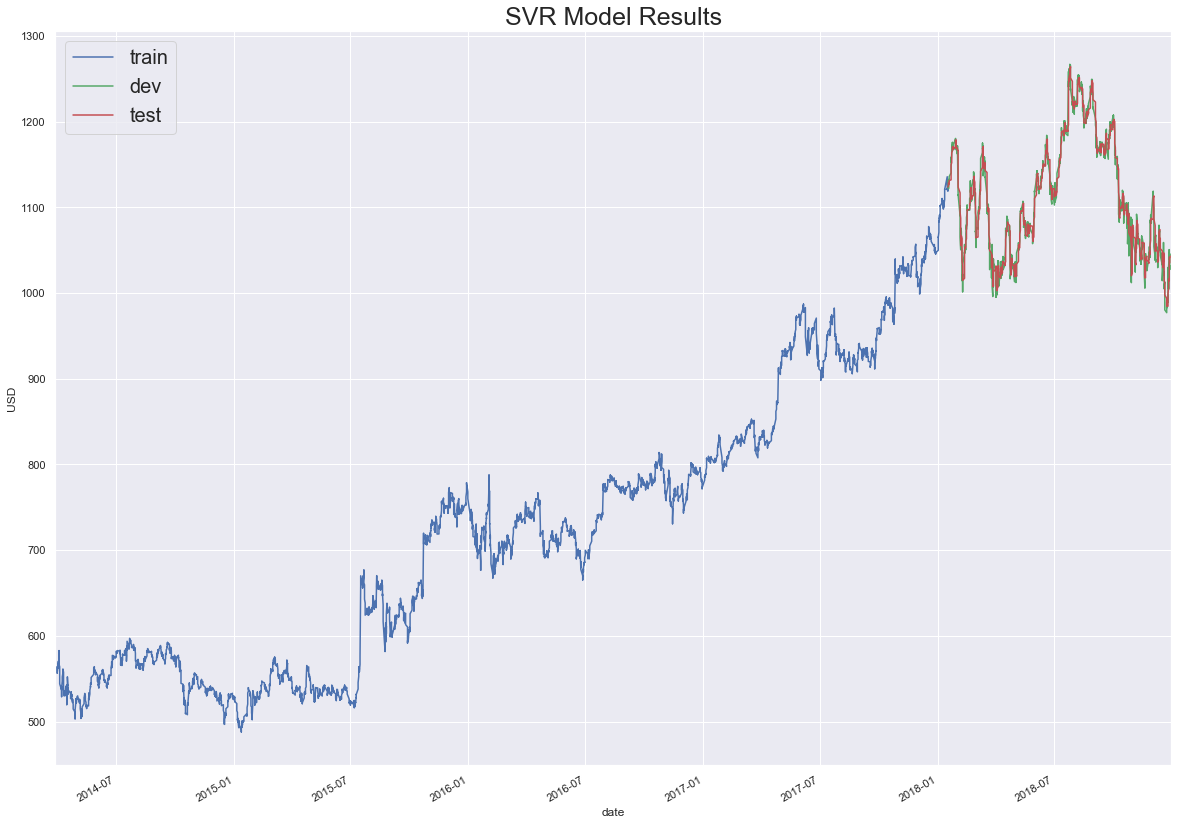

In [35]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results = []
val = []
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
c = 1/8
g = 1/2
svr = SVR(kernel= 'rbf', C=1/8, gamma=1/2)
model = svr.fit(X_train_scaled, y_train_scaled)
est_scaled = model.predict(X_sample_scaled)
test['est_scaled'] = est_scaled
test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
mse = mean_squared_error(y_sample, test['est'])
mae = mean_absolute_error(y_sample, test['est'])
rmse = math.sqrt(mean_squared_error(y_sample, test['est']))
mape = get_mape(y_sample, test['est'])
acc = model.score( X_sample, test['est'].values.reshape(-1,1))
r2 = r2_score(y_sample, test['est'])
vals = [rmse,mape,c,g,acc,r2, mse, mae]
results.append(vals)

rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_ylabel("USD")
        



Text(0, 0.5, 'USD')

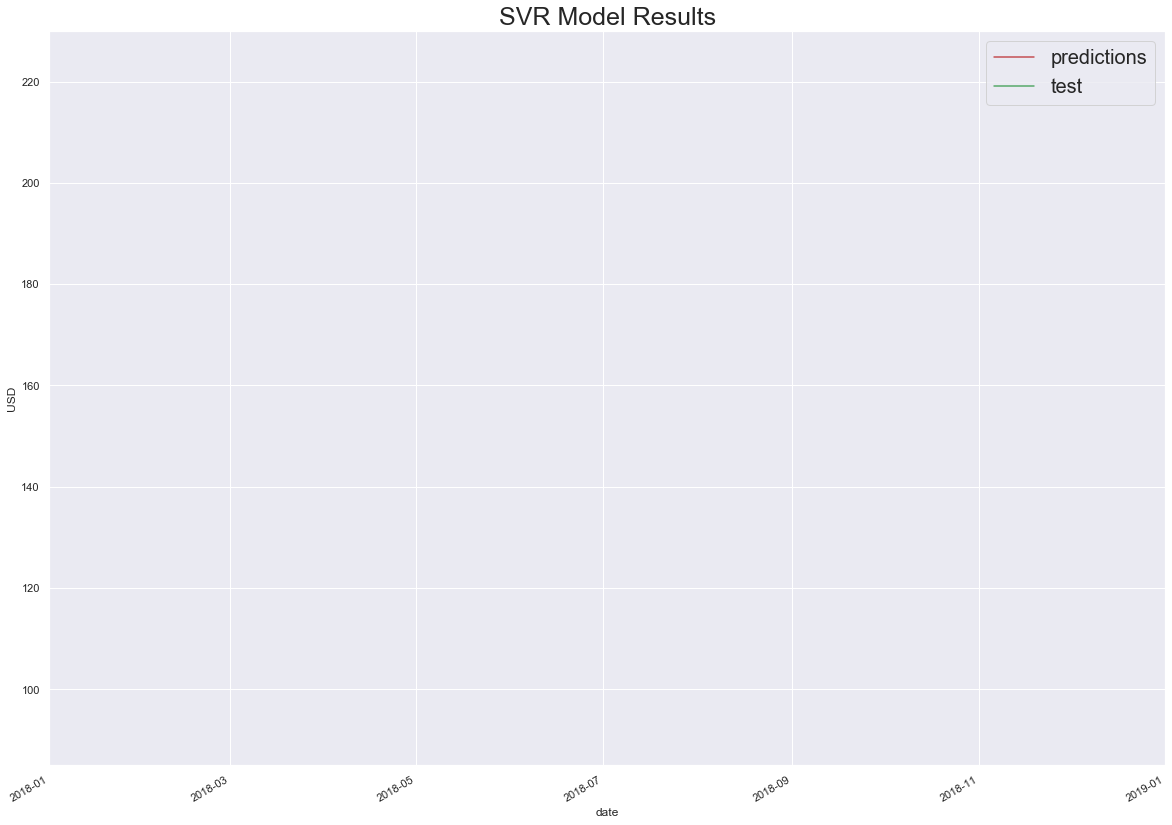

In [36]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['predictions', 'test'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_xlim(['2018', '2019'])
ax.set_ylim([85, 230])
ax.set_ylabel("USD")

In [73]:
print("RMSE:", rmse )
print("MAPE:", mape )
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 2.4061981141582764
MAPE: 0.8412213714187593
MSE: 5.789789364578845
MAE: 1.4136209566630593
R^2: 0.9806288116370263
